## Добавляем необходимые библиотеки

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

## Чтение датасета

In [21]:
videogames = pd.read_csv("vgsales.csv")
videogames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
2,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
3,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
4,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
...,...,...,...,...,...,...,...,...,...,...
16534,LEGO Harry Potter: Years 5-7,PC,NaN,Action,Warner Bros. Interactive Entertainment,0.05,0.14,0.0,0.03,0.22
16535,Happy Feet Two,DS,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.02,0.0,0.01,0.12
16536,Happy Feet Two,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.01,0.0,0.01,0.10
16537,Happy Feet Two,X360,NaN,Action,Warner Bros. Interactive Entertainment,0.08,0.01,0.0,0.01,0.10


## Общая информация о данных

In [22]:
videogames.shape

(16539, 10)

In [23]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16539 non-null  object 
 1   Platform      16539 non-null  object 
 2   Year          16290 non-null  float64
 3   Genre         16539 non-null  object 
 4   Publisher     16539 non-null  object 
 5   NA_Sales      16539 non-null  float64
 6   EU_Sales      16539 non-null  float64
 7   JP_Sales      16539 non-null  float64
 8   Other_Sales   16539 non-null  float64
 9   Global_Sales  16539 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [24]:
videogames.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16539,11441,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16539,31,PS2,2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,16290.0,NaN,NaN,NaN,2006.404727,5.831618,1980.0,2003.0,2007.0,2010.0,2017.0
Genre,16539,12,Action,3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,16539,578,Electronic Arts,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,16539.0,NaN,NaN,NaN,0.265079,0.817953,0.0,0.0,0.08,0.24,41.49
EU_Sales,16539.0,NaN,NaN,NaN,0.146892,0.506143,0.0,0.0,0.02,0.11,29.02
JP_Sales,16539.0,NaN,NaN,NaN,0.078003,0.309809,0.0,0.0,0.0,0.04,10.22
Other_Sales,16539.0,NaN,NaN,NaN,0.048193,0.188884,0.0,0.0,0.01,0.04,10.57
Global_Sales,16539.0,NaN,NaN,NaN,0.538441,1.55747,0.01,0.06,0.17,0.48,82.74


In [25]:
videogames['Global_Sales'].describe()

count    16539.000000
mean         0.538441
std          1.557470
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

## Анализ количественной информации

<AxesSubplot: >

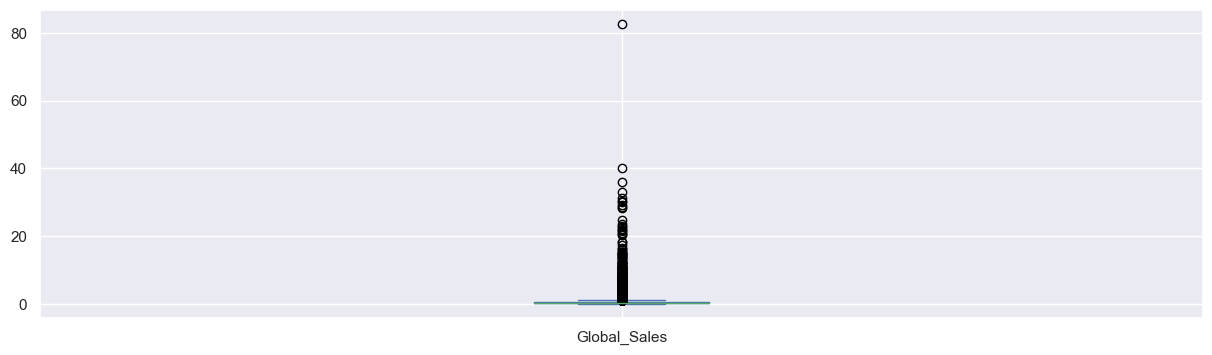

In [56]:
videogames['Global_Sales'].plot(kind='box')

In [105]:
IQR = np.quantile(videogames['Global_Sales'],0.75) - np.quantile(videogames['Global_Sales'],0.25)

In [106]:
IQR

0.42

In [104]:
np.quantile(videogames['Global_Sales'], 0.5) == videogames['Global_Sales'].median(), np.quantile(videogames['Global_Sales'], 0.5)

(True, 0.17)

In [100]:
videogames['Global_Sales'].min(),videogames['Global_Sales'].max()

(0.01, 82.74)

<AxesSubplot: >

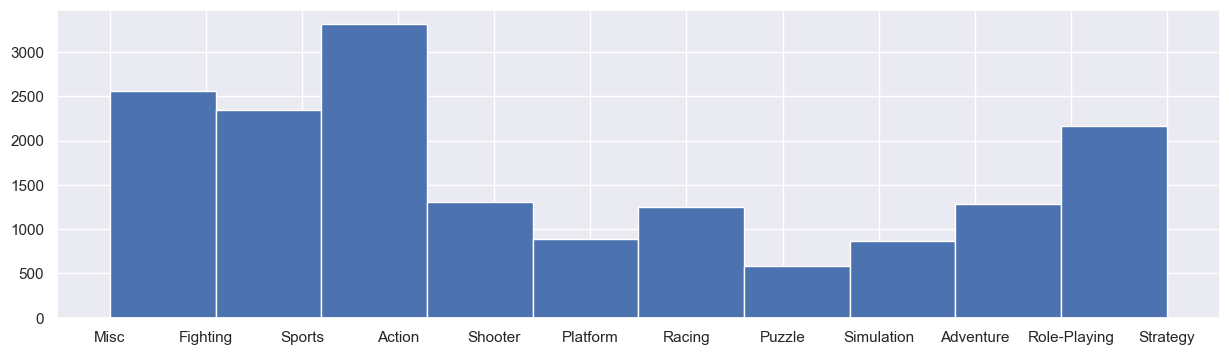

In [29]:

videogames['Genre'].hist()

<AxesSubplot: >

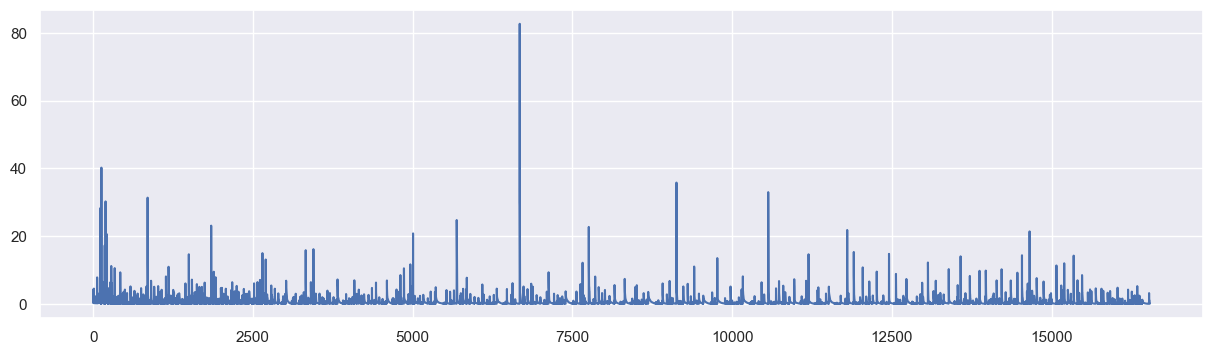

In [43]:
videogames['Global_Sales'].plot()

<AxesSubplot: ylabel='Year'>

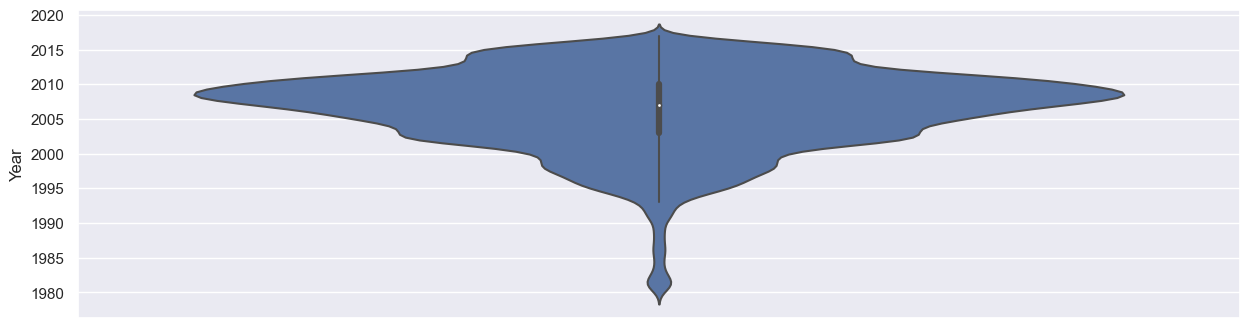

In [47]:
sns.violinplot(y = 'Year', data= videogames )

In [49]:
videogames['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
Name: Year, dtype: int64

## Анализ категориальной информации

<AxesSubplot: xlabel='Genre', ylabel='count'>

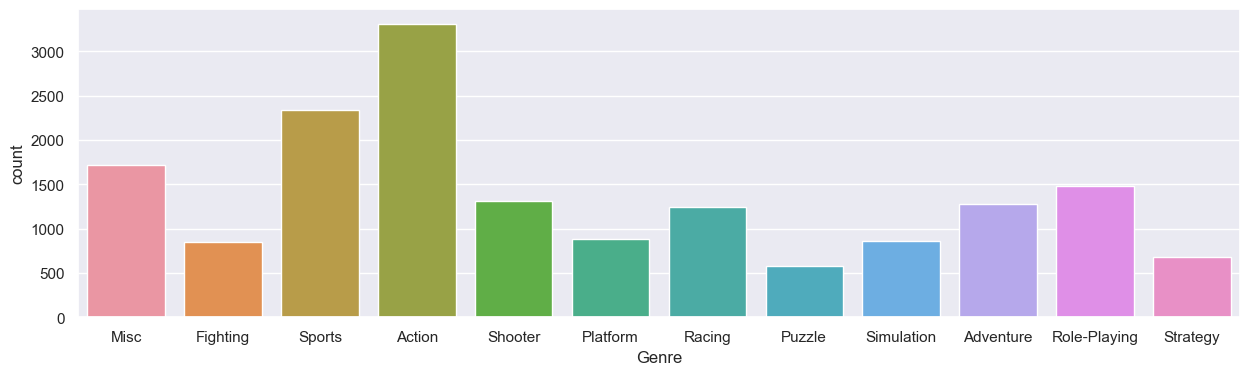

In [50]:
sns.countplot(x = 'Genre', data = videogames )

In [74]:
videogames['Y'] = videogames['Global_Sales']  > 0.5

<AxesSubplot: xlabel='Year', ylabel='count'>

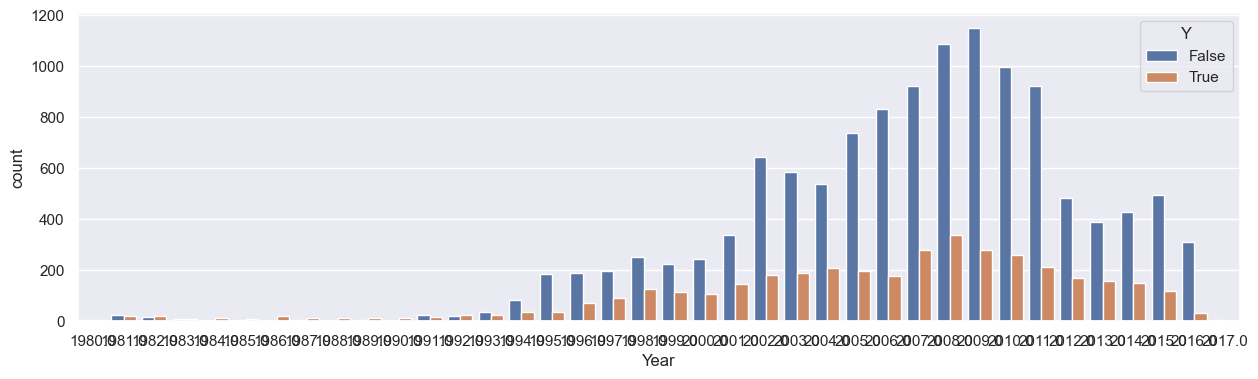

In [77]:
sns.countplot(x = 'Year',hue = 'Y', data = videogames )

In [78]:
videogames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Y
0,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15,True
1,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77,True
2,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49,False
3,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34,False
4,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27,False
...,...,...,...,...,...,...,...,...,...,...,...
16534,LEGO Harry Potter: Years 5-7,PC,NaN,Action,Warner Bros. Interactive Entertainment,0.05,0.14,0.0,0.03,0.22,False
16535,Happy Feet Two,DS,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.02,0.0,0.01,0.12,False
16536,Happy Feet Two,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.01,0.0,0.01,0.10,False
16537,Happy Feet Two,X360,NaN,Action,Warner Bros. Interactive Entertainment,0.08,0.01,0.0,0.01,0.10,False


## Сравнение распределений признаков для разных классов

<AxesSubplot: xlabel='Y', ylabel='Year'>

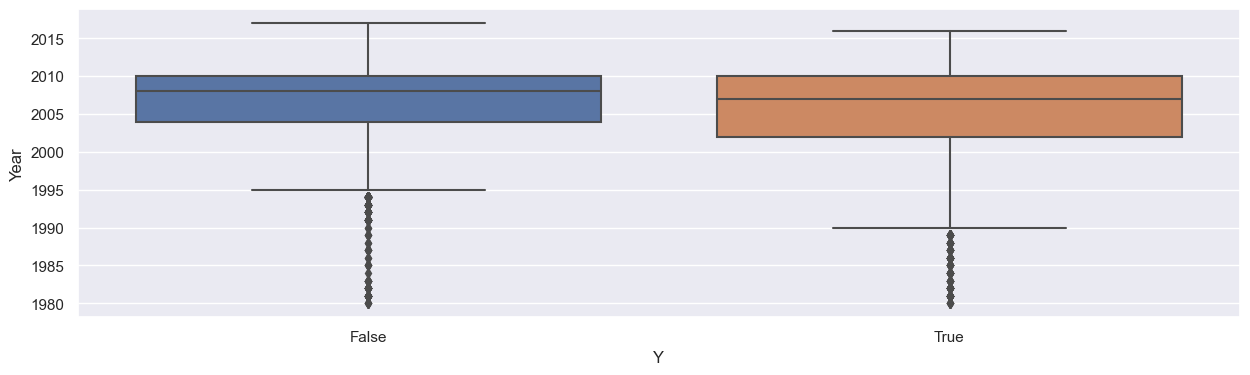

In [76]:
sns.boxplot(x ='Y', y = 'Year', data = videogames)

## Анализ зависимости двух непрерывных переменных

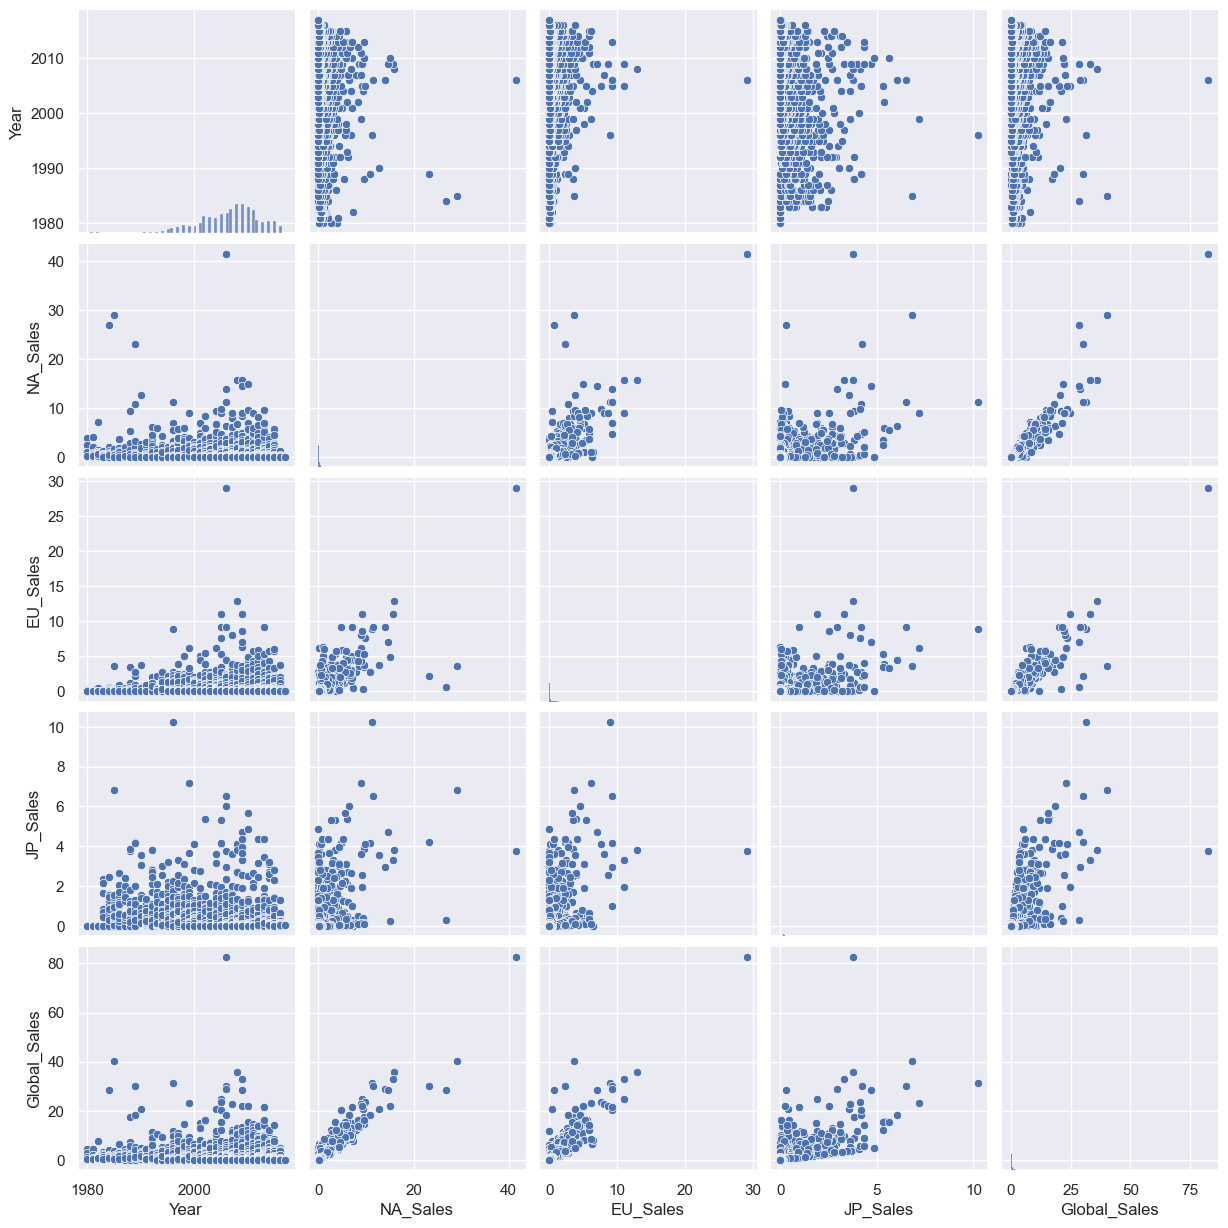

In [85]:
sns.pairplot(videogames[['Year',
       'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Global_Sales']])

In [90]:
corr = videogames[['Year',
       'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Global_Sales']].corr()

In [91]:
corr

,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Year,1.000000,-0.091301,0.006151,-0.169379,-0.074637
NA_Sales,-0.091301,1.000000,0.767674,0.449865,0.941037
EU_Sales,0.006151,0.767674,1.000000,0.435655,0.902818
JP_Sales,-0.169379,0.449865,0.435655,1.000000,0.611892
Global_Sales,-0.074637,0.941037,0.902818,0.611892,1.000000


In [92]:
corr['Year']

Year            1.000000
NA_Sales       -0.091301
EU_Sales        0.006151
JP_Sales       -0.169379
Global_Sales   -0.074637
Name: Year, dtype: float64

<AxesSubplot: >

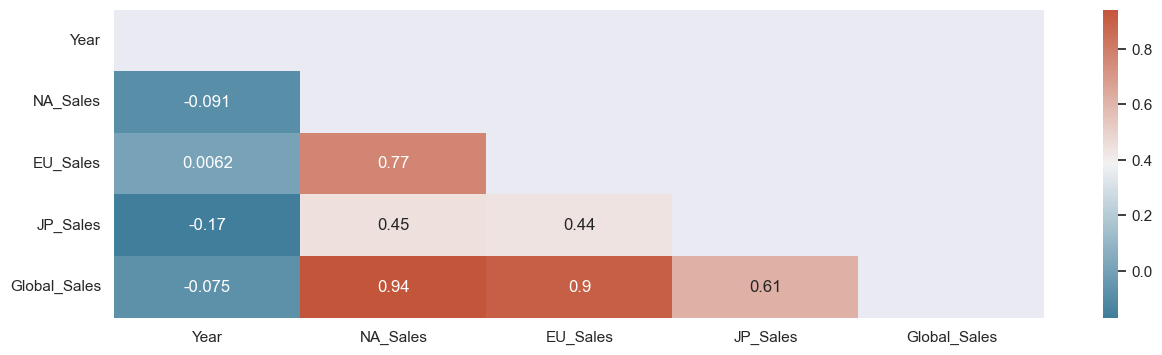

In [93]:
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,annot=True,mask=mask, cmap=cmap)

<AxesSubplot: xlabel='Global_Sales', ylabel='Genre'>

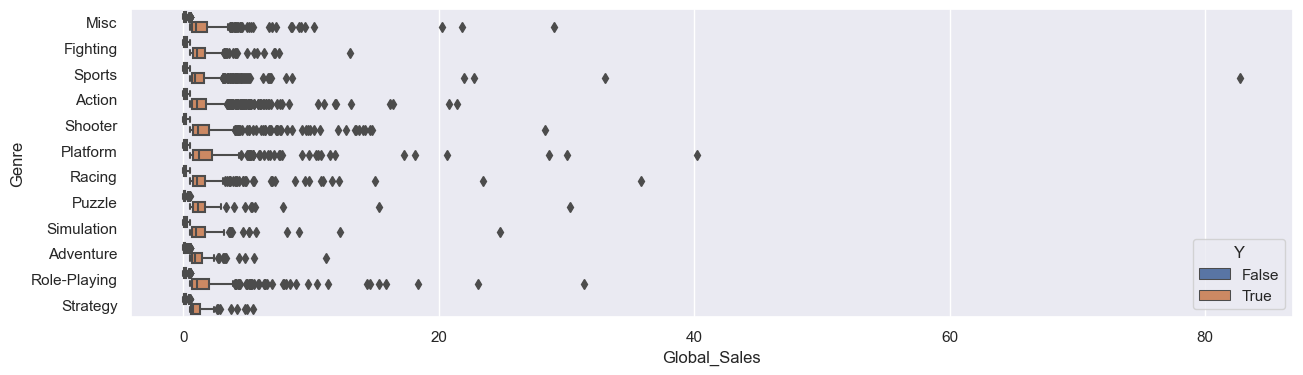

In [95]:
sns.boxplot(x= 'Global_Sales', y='Genre',hue='Y',data = videogames)